# Background

In 1990 a framework was introduced by Nowak in order to study memory one strategies. The paper models a match between players \(p\) and \(q\) as a stochastic process. This allow us to easily calculate the outcome of the match, the scores, without simulating the interactions.

In this notebook we go through Nowak's formulation and even compare it to the Press and Dyson formulation and reassure that they are equivalent.

In [1]:
import opt_mo
import sympy as sym

sym.init_printing()

In [2]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")
q_1, q_2, q_3, q_4 = sym.symbols("q_1, q_2, q_3, q_4")

In [3]:
p = opt_mo.MemoryOneStrategy(p_1, p_2, p_3, p_4)
q = opt_mo.MemoryOneStrategy(q_1, q_2, q_3, q_4)

The markov chain $M$.

In [4]:
M = p.markov(q)

In [5]:
with open("../tex/m_matrix.tex", "w") as f:
    f.write("M = {}".format(sym.latex(M)))

Let $v$ be the stationary vector of $M$, where $M$ is the transition matrix $M(p,q)$.

In [6]:
pi_1, pi_2, pi_3, pi_4 = sym.symbols('pi_1, pi_2, pi_3, pi_4')
pi = (pi_1, pi_2, pi_3, pi_4)

In [7]:
ss = opt_mo.stable_states(M, pi)

Once the markovian matrix is defined we can calculate the stable states of the matrix. 
The stable states multiplied  by the scores of each state return the score of a player. The payoff matrices for $X$ and $Y$ equivilant are: $S_{p} = (R, S, T, P)$ & $S_{q} = (R, S, T, P)$

In [8]:
v = sym.Matrix([[ss[pi_1]], [ss[pi_2]], [ss[pi_3]], [ss[pi_4]]])

In [9]:
R, S, T, P = sym.symbols("R, S, T, P")
payoffs = (R, S, T, P)

In [10]:
utility = v[0] * payoffs[0] + v[1] * payoffs[1] + v[2] * payoffs[2] + v[3] * payoffs[3]

To test this we can have a defector play against a defector. We know that the score should be 1. Similar for two cooperators the score should be 3.

In [11]:
utility.subs({p_1:0, p_2:0, p_3:0, p_4:0, q_1:0, q_2:0, q_3:0, q_4:0})

In [12]:
utility.subs({p_1:0, p_2:0, p_3:0, p_4:0, q_1:1, q_2:1, q_3:1, q_4:1})

In [13]:
utility.simplify().subs({p_1:1, p_2:1, p_3:1, p_4:1, q_1:1, q_2:1, q_3:1, q_4:1})

**Comparison to Press and Dyson formulation.**

In Press and Dyson's work on their 2012 article. They have managed to prove
that:

 $$v \times S_{p} = \frac{D (p, q, S_{p})} {D (p, q, 1)}$$

where $D$ is a $4 \times 4$ determinant as shown below.

Matrix M will be named to A to use the same notion as the article.

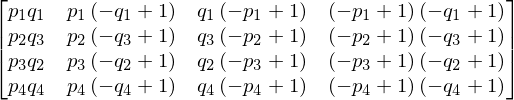

In [14]:
A = M
A

In [15]:
S_p = sym.Matrix([[3, 0, 5, 1]])

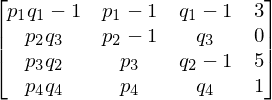

In [19]:
B = opt_mo.make_B(S_p, (p_1, p_2, p_3, p_4), (q_1, q_2, q_3, q_4))
B

In [25]:
def pd_utility(S_p, x, y):
    """
    Returns the utility as a function
    of p, q vectors. Based on Press and Dyson, 2012.
    """
    B = opt_mo.make_B(S_p, x, y)
    unit= opt_mo.make_B((1, 1, 1, 1), x, y)
    return  B.det() / unit.det()

In [26]:
x = (0, 0, 0, 0)

In [28]:
u = pd_utility(S_p, x, (q_1, q_2, q_3, q_4))

In [29]:
u == utility.subs({S:0, R:3, T:5, P:1}).simplify()

False